In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import spacy
import graphviz #You also need to install the command line graphviz
%matplotlib inline
import nltk
import warnings
from collections import Counter
from spacy import displacy
from tools import *

nlp = spacy.load("en")
warnings.filterwarnings("ignore")

## Prepare dataset
For this assignment I am using a corpus of articles I scraped from the Heritage Foundation, a far-right think tank. I cleaned the text a little bit before tokenizing.

In [2]:
src = "/Users/chen.liang/Desktop/Winter_2020/Content_Analysis/Content-Analysis-2021/"
heritage_text = pd.read_csv(src+'heritage_text.csv')

In [3]:
text = heritage_text['text']
text = [i.split('Editor’s note: ')[-1] for i in text]
text = [i.split('The Daily Signal depends on the support of readers like you.')[0] 
        for i in text]
text = [i.strip('\n').strip('\t') for i in text]
heritage_text['text'] = text
print(heritage_text.shape)
heritage_text.head()

(326, 2)


,text,from
0,This week we feature two letters that really g...,heritage
1,Thousands of pro-lifers move down the streets ...,heritage
2,Volunteers paint over a wall covered in graffi...,heritage
3,Then-U.S. Supreme Court nominee Clarence Thoma...,heritage
4,White House counsel Pat Cipollone arrives Tues...,heritage


## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

Here I focus on an article about impeachment. As shown below, the words that appear the most are stopwords and the frequency of words follows the Zipf's Law. The words "Congress" and "impeachment" are used throughout the article.

In [5]:
clean_text = clean_raw_text(heritage_text['text'])
whTokens = word_tokenize(clean_text[13]) ## This is an article about impeachment
whTokens[0:5]

['The', 'partisan', 'nature', 'of', 'this']

In [7]:
countedWords = wordCounter(word_tokenize(clean_text[0]))
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords.head()

,word,count
18,the,82
26,and,49
28,to,47
45,in,37
92,of,37


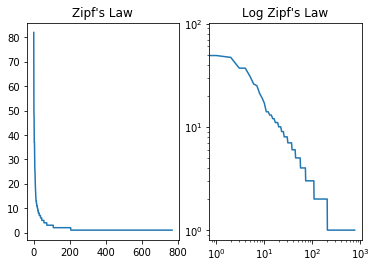

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(len(countedWords)), countedWords['count'])
ax1.set_title('Zipf\'s Law')
ax2.plot(range(len(countedWords)), countedWords['count'])
ax2.set_title('Log Zipf\'s Law')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [9]:
whText = nltk.Text(whTokens)
whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('impeachment')

Displaying 10 of 10 matches:
artisan nature of this particular impeachment will end up weakening not just Tr
 not the House ’s handling of the impeachment of President Donald Trump has inf
artisan nature of this particular impeachment will end up weakening not just Tr
ongress and being threatened with impeachment based on the flimsiest of evidenc
ct that last week both lead House impeachment manager Rep. Adam Schiff and Sena
ence gathering When Congress uses impeachment as a political weapon it has the 
 his staff from testifying in the impeachment hearings the House charged him wi
 Framers were very concerned that impeachment would be used as a political weap
until the next election With this impeachment the House has threatened our very
in the process The mere threat of impeachment may be all that is needed to stop


In [10]:
whText.common_contexts(['government'])

of_and federal_and of_in of_from


In [11]:
whText.count('Congress')

9

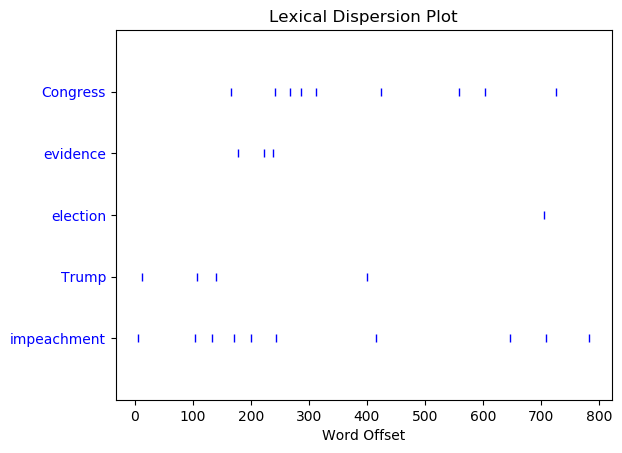

In [12]:
sns.reset_orig()
whText.dispersion_plot(['Congress','evidence', 'election', 'Trump', 'impeachment'])
#sns.set()

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

The heritage foundation, as expected, focuses a lot on religion, state rights, tax, family, and law enforcement. It pays more attention to school/ education than I expected. Also, the high prequency superlative adjectives look quite positive, probably suggesting the point Professor James Evan's paper once talked about: Conservatives like to pretend that they are happy in their linguistic expression. Also, "they" is used more than "we," and "he" is used more than "she." This may suggest certain mindset, but I need to compare this with a liberal dataset first.

In [13]:
heritage_text['tokenized_text'] = heritage_text['text'].apply(lambda x: word_tokenize(x))

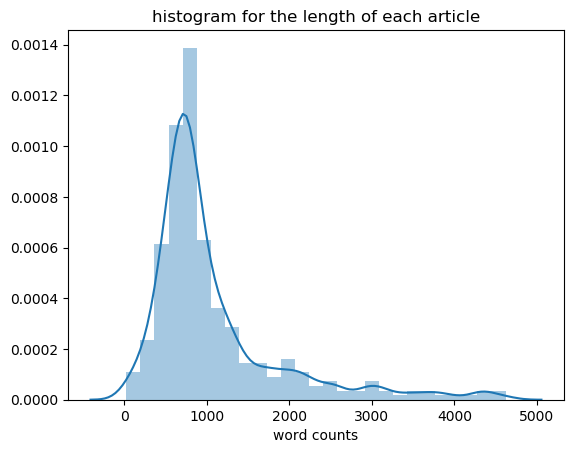

In [14]:
heritage_text['word_counts'] = heritage_text['tokenized_text'].apply(lambda x: len(x))
sns.distplot(heritage_text['word_counts'])
plt.rcParams["figure.figsize"] = (8,5)
plt.title('histogram for the length of each article')
plt.xlabel('word counts')
plt.show()

In [15]:
countsDict = {}
for word in heritage_text['tokenized_text'].sum():
    if word in countsDict: countsDict[word] += 1
    else: countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
print(word_counts[:50])

[('the', 18256), ('to', 10198), ('of', 9246), ('and', 8322), ('a', 7084), ('in', 6504), ('that', 5193), ('’s', 3920), ('is', 3738), ('for', 3279), ('The', 2788), ('on', 2322), ('it', 2105), ('are', 2081), ('as', 1896), ('with', 1874), ('have', 1744), ('not', 1659), ('be', 1569), ('was', 1559), ('from', 1521), ('I', 1456), ('at', 1439), ('by', 1439), ('they', 1299), ('has', 1296), ('this', 1293), ('their', 1223), ('an', 1189), ('who', 1127), ('or', 1115), ('we', 1088), ('n’t', 1081), ('he', 1068), ('you', 1011), ('said', 990), ('would', 982), ('his', 922), ('more', 898), ('do', 851), ('about', 837), ('U.S.', 796), ('will', 792), ('but', 769), ('Trump', 764), ('can', 744), ('its', 698), ('people', 697), ('In', 697), ('what', 686)]


In [16]:
### The stop list is then all words that occur before the first noun...okay
stop_words_freq = []
for word, count in word_counts:
    if word == 'U.S.': break
    else: stop_words_freq.append(word)
print(stop_words_freq)

['the', 'to', 'of', 'and', 'a', 'in', 'that', '’s', 'is', 'for', 'The', 'on', 'it', 'are', 'as', 'with', 'have', 'not', 'be', 'was', 'from', 'I', 'at', 'by', 'they', 'has', 'this', 'their', 'an', 'who', 'or', 'we', 'n’t', 'he', 'you', 'said', 'would', 'his', 'more', 'do', 'about']


In [17]:
heritage_text['normalized_tokens'] = heritage_text['tokenized_text'].apply(lambda x: normalizeTokens(x))
heritage_text['normalized_tokens_count'] = heritage_text['normalized_tokens'].apply(lambda x: len(x))
heritage_text.head()

,text,from,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,This week we feature two letters that really g...,heritage,"[This, week, we, feature, two, letters, that, ...",1680,"[week, feature, letter, grab, attention, reade...",800
1,Thousands of pro-lifers move down the streets ...,heritage,"[Thousands, of, pro, lifers, move, down, the, ...",81,"[thousand, pro, lifer, street, washington, d.c...",45
2,Volunteers paint over a wall covered in graffi...,heritage,"[Volunteers, paint, over, a, wall, covered, in...",3484,"[volunteer, paint, wall, cover, graffiti, phot...",1295
3,Then-U.S. Supreme Court nominee Clarence Thoma...,heritage,"[Then, U.S., Supreme, Court, nominee, Clarence...",2893,"[u.s, supreme, court, nominee, clarence, thoma...",1163
4,White House counsel Pat Cipollone arrives Tues...,heritage,"[White, House, counsel, Pat, Cipollone, arrive...",1305,"[white, house, counsel, pat, cipollone, arrive...",656


In [18]:
hist = Counter(heritage_text['normalized_tokens'].sum())

In [19]:
countedWords = pd.DataFrame({'word':list(hist), 'count':list(hist.values())})
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords = countedWords[:31]
countedWords = countedWords[countedWords['word'] != '$']
word = ['US' if i == 'u.s' else i for i in countedWords['word']]
countedWords['word'] = word
countedWords['freq'] = countedWords['count']/len(heritage_text['normalized_tokens'].sum())
countedWords.head()

,word,count,freq
455,say,1482,0.008242
131,state,1043,0.005800
191,school,943,0.005244
9,US,801,0.004455
367,president,781,0.004343


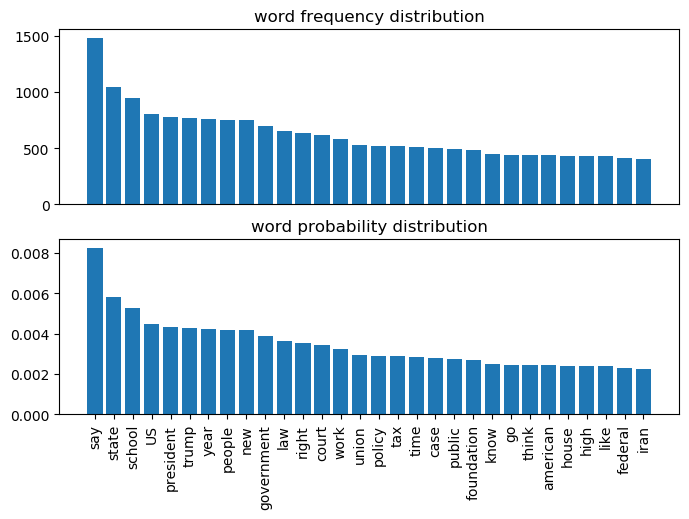

In [20]:
fig, (ax1, ax2) = plt.subplots(2)
plt.rcParams["figure.figsize"] = (20,5)
ax1.bar(countedWords['word'], countedWords['count'])
ax1.set_xticks([])
ax1.set_title('word frequency distribution')
ax2.bar(countedWords['word'], countedWords['freq'])
ax2.set_title('word probability distribution')
plt.xticks(countedWords['word'], rotation='vertical')
plt.show()

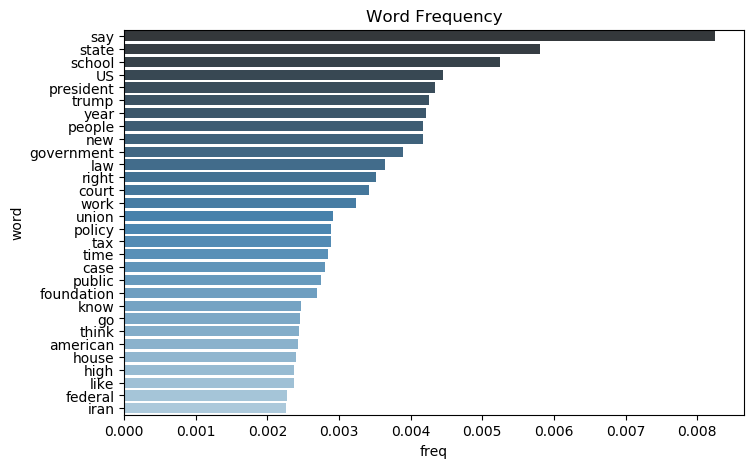

In [21]:
plt.rcParams["figure.figsize"] = (8,5)
plt.title('Word Frequency')
sns.barplot(y='word', x='freq', data = countedWords, palette="Blues_d")
plt.show()

In [22]:
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in heritage_text['normalized_tokens'].sum()))
print(whcfdist.N()) #the number of words

179814


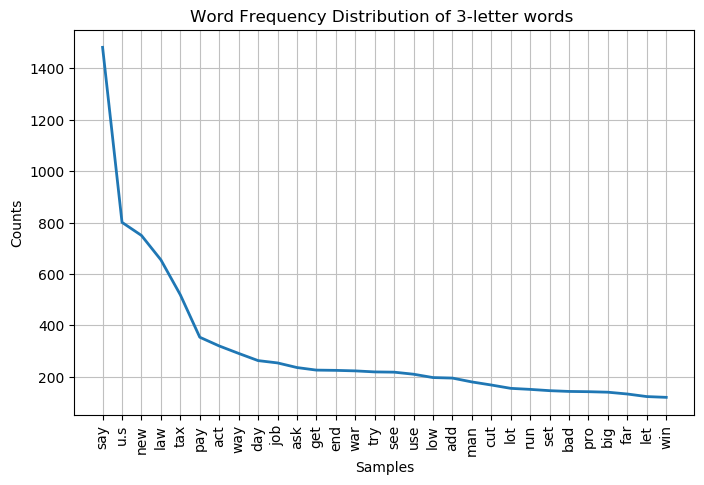

In [23]:
plt.title('Word Frequency Distribution of 3-letter words ')
whcfdist[3].plot(30) ## plot only top 30
plt.show()

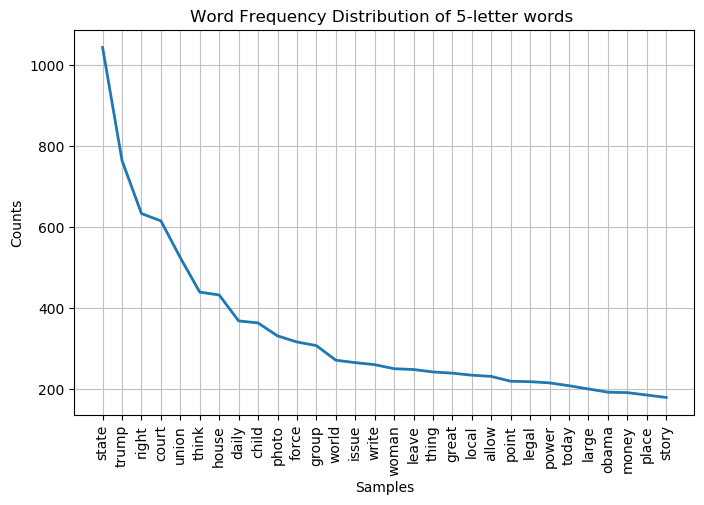

In [24]:
plt.title('Word Frequency Distribution of 5-letter words ')
whcfdist[5].plot(30) ## plot only top 30
plt.show()

In [25]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)
print(whcpdist[5].max())
print(whcpdist[5].prob(whcpdist[5].max()))

state
0.03522065648468484


### POS: Word's role in the sentence, or its part of speech

In [26]:
heritage_text['normalized_tokens_POS'] = [spacy_pos(t) for t in heritage_text['text']]

In [27]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(heritage_text['normalized_tokens_POS'].sum())
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) 
                     for w, p in heritage_text['normalized_tokens_POS'].sum())
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

In [28]:
whcfdist_POStoWord['JJ'] ## superlative adjectives

FreqDist({'other': 566, 'public': 439, 'new': 419, 'federal': 388, '-': 347, 'many': 344, 'religious': 334, 'american': 319, 'political': 314, 'daily': 285, ...})

In [29]:
whcfdist_POStoWord['NN'].most_common(5) ## nouns

[('government', 668),
 ('state', 666),
 ('school', 528),
 ('tax', 494),
 ('law', 449)]

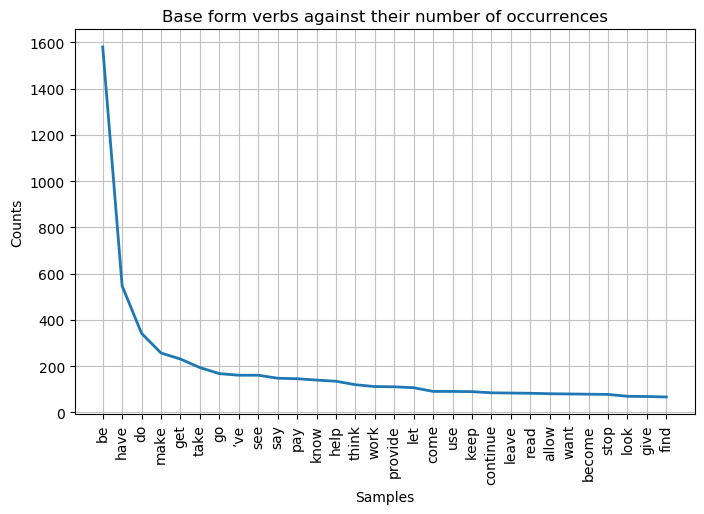

In [30]:
plt.title('Base form verbs against their number of occurrences')
whcfdist_POStoWord['VB'].plot(30)
plt.show()

In [31]:
print(whcpdist_POStoWord['NN'].max())
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

government
0.011173884700887558


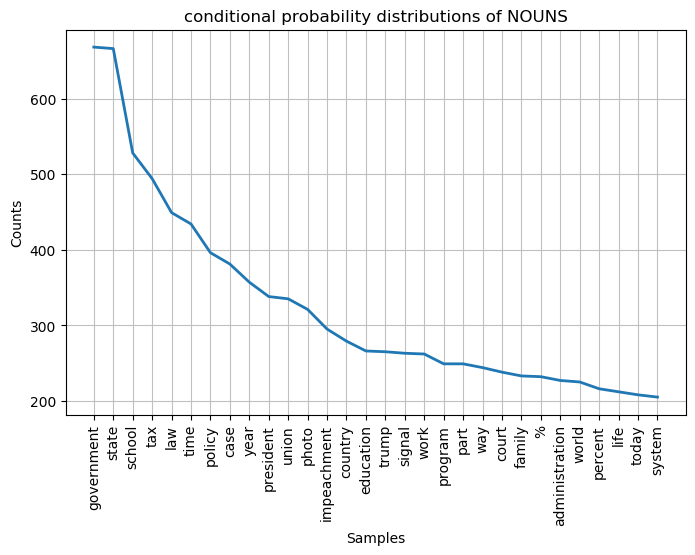

In [32]:
plt.title('conditional probability distributions of NOUNS')
whcfdist_POStoWord['NN'].plot(30)
plt.show()

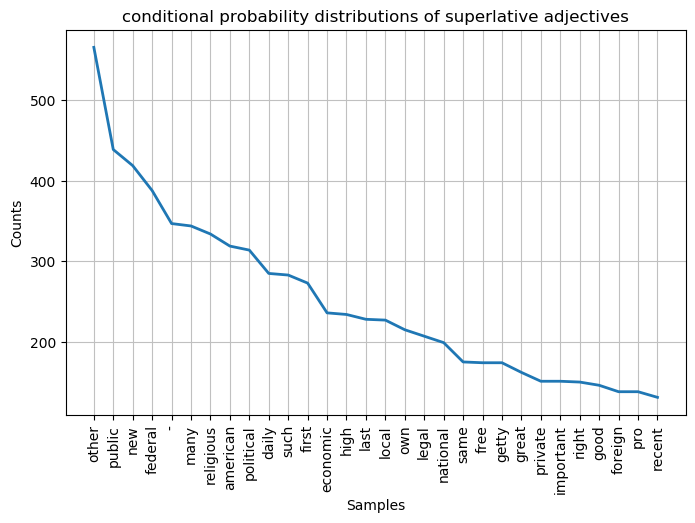

In [33]:
plt.title('conditional probability distributions of superlative adjectives')
whcfdist_POStoWord['JJ'].plot(30)
plt.show()

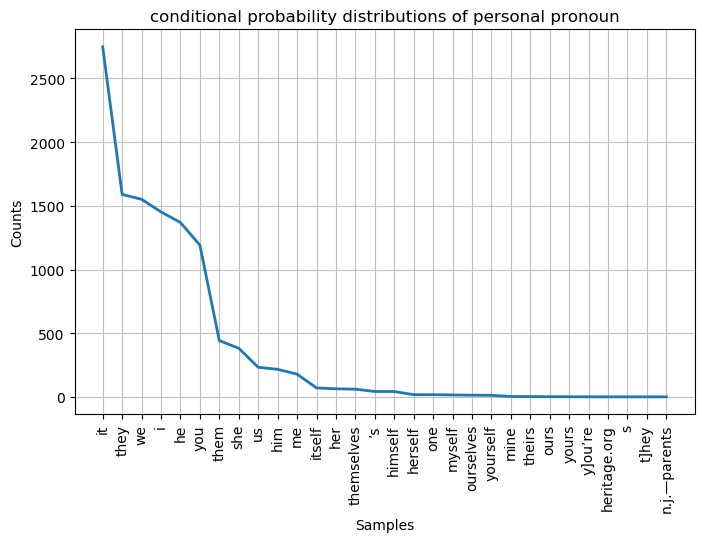

In [34]:
plt.title('conditional probability distributions of personal pronoun')
whcfdist_POStoWord['PRP'].plot(30)
plt.show()

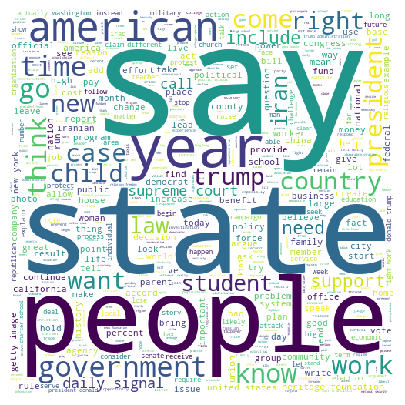

In [35]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, 
                         height = 1000, mode ='RGBA', 
                         scale=.5).generate(' '.join(heritage_text['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.show()

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

It is interesting to see how the word "state" is associated with such a wide range of adjectives. But using the word "state" so frequently may suggest a narrative of national myth and a focus on status quo. The adjectives associated with the word "country" also suggests a general patriot theme: 'free,' 'proud,' 'great,' 'only,' and 'perfect,' etc. No wonder why this is a corpus from the Heritage Foundation.

In [36]:
heritage_text['normalized_tokens_POS']

0      [(this, DT), (week, NN), (we, PRP), (feature, ...
1      [(thousands, NNS), (of, IN), (pro, JJ), (-, NN...
2      [(volunteers, NNS), (paint, VBP), (over, IN), ...
3      [(then, RB), (-, HYPH), (u.s, NNP), (., NNP), ...
4      [(white, NNP), (house, NNP), (counsel, NNP), (...
                             ...                        
321    [(on, IN), (wednesday, NNP), (,, ,), (presiden...
322    [(juggling, NN), (work, NN), (and, CC), (famil...
323    [(the, DT), (labor, NN), (market, NN), (did, V...
324    [(the, DT), (aviation, NN), (innovation, NNP),...
325    [(the, DT), (new, JJ), (jobs, NNS), (report, N...
Name: normalized_tokens_POS, Length: 326, dtype: object

In [37]:
def count_type(target):
    targetCounts = {}
    for entry in heritage_text['normalized_tokens_POS']:
        for ent, kind in entry:
            if kind != target: continue
            elif ent in targetCounts: targetCounts[ent] += 1
            else: targetCounts[ent] = 1
    return sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

def conditional_associations(target, word):
    NResults = set()
    for entry in heritage_text['normalized_tokens_POS']:
        for (ent1, kind1),(ent2,kind2) in zip(entry[:-1], entry[1:]):
            if (kind1,ent2.lower())==(target, word): NResults.add(ent1)
            else: continue
    return NResults

In [38]:
count_type('NN')[:10]

[('government', 668),
 ('state', 666),
 ('school', 528),
 ('tax', 494),
 ('law', 449),
 ('time', 434),
 ('policy', 396),
 ('case', 381),
 ('year', 357),
 ('president', 338)]

In [39]:
count_type('VB')[:10]

[('be', 1580),
 ('have', 547),
 ('do', 342),
 ('make', 257),
 ('get', 231),
 ('take', 194),
 ('go', 168),
 ('’ve', 161),
 ('see', 161),
 ('say', 148)]

In [40]:
print(conditional_associations('JJ', 'state'))

{'rich', 'second', 'legitimate', 'outdoor', 'chinese', 'nuclear', 'certain', 'former', 'black', 'valid', 'republican', 'deep', 'jewish', 'disastrous', 'entire', 'inefficient', 'ukrainian', 'sorry', 'top', 'current', '-', 'sovereign', 'various', 'regulatory', 'official', 'other', 'golden', 'abortion', 'whole', 'obscure', 'blue', 'substantial', 'powerful', 'liberal', '38th', 'palestinian', 'own', 'islamic', 'unfunded', 'iranian', 'first', 'only', 'new', 'incumbent'}


In [41]:
print(conditional_associations('JJ', 'country'))

{'entire', 'fractured', 'proud', 'own', 'life', 'northern', 'foreign', 'unlikely', 'perfect', 'christian', 'new', 'other', 'shiite', 'only', 'whole', 'great', 'free'}


In [42]:
print(conditional_associations('JJ', 'law'))

{'democratic', 'chief', 'religious', 'american', 'nonprofit', 'such', 'international', 'ukrainian', 'sanctuary', 'local', 'domestic', 'existing', 'natural', 'current', 'hijab', 'primary', 'french', 'federal', 'similar', 'constitutional', 'other', 'obscure', 'basic', 'private', 'life', 'seila', 'islamic', 'criminal', 'new', 'bloated', 'established'}


In [43]:
print(conditional_associations('JJ', 'community'))

{'progressive', 'same', 'democratic', 'muslim', 'american', 'rural', 'international', 'prominent', 'local', 'latino', 'active', 'hispanic', 'federal', 'gay', 'other', 'environmental', 'strong', 'medical', 'christian', 'transatlantic', 'shiite'}


In [44]:
print(conditional_associations('RB', 'stop'))

{'not', 'just', 'also', 'n’t'}


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

Two patterns here: First, there are clearly lots of daily-signal (this website)'s advertisement that is not cleaned. Second, some bigrams are locations: Hong Kong, San Francisco, etc. The best scored bigrams "supreme court," "right work," "donald trump," nevertheless, suggest a strong presidential preference--which, perhaps, even over partisan preference--of the Heritage Foundation, which corresponds to many qualititative reports.


In [45]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(heritage_text['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 179814 bigrams in the finder


The Heritage Foundation loves the word "united," or it is just so much things are named with "united." The occurance of 'United States' consitutes about 40% of all "united."

In [46]:
# what else is 'united' besides the 'United States'
sum_united = sum([whBigrams.ngram_fd[i] for i in whBigrams.ngram_fd if 'united' in i])
sum_us = whBigrams.ngram_fd[('united', 'states')]
print(sum_us/ sum_united)
print(list(set([i for i in whBigrams.ngram_fd if 'united' in i]))[:10])

0.4036144578313253
[('turkey', 'united'), ('add', 'united'), ('ukraine', 'united'), ('united', 'states'), ('archivist', 'united'), ('greenland', 'united'), ('sept', 'united'), ('course', 'united'), ('jerusalem', 'united'), ('recent', 'united')]


In [47]:
# what else is 'supreme' besides the 'supreme court'
sum_united = sum([whBigrams.ngram_fd[i] for i in whBigrams.ngram_fd if 'supreme' in i])
sum_us = whBigrams.ngram_fd[('supreme', 'court')]
print(sum_us/ sum_united)
print(list(set([i for i in whBigrams.ngram_fd if 'supreme' in i]))[:10])

0.4840255591054313
[('add', 'supreme'), ('outside', 'supreme'), ('god', 'supreme'), ('work', 'supreme'), ('go', 'supreme'), ('image', 'supreme'), ('counteract', 'supreme'), ('kansas', 'supreme'), ('upcoming', 'supreme'), ('employ', 'supreme')]


In [48]:
print(whBigrams.nbest(bigramScoring, 10))

[('supreme', 'court'), ('daily', 'signal'), ('heritage', 'foundation'), ('united', 'states'), ('new', 'york'), ('>', '>'), ('right', 'work'), ('donald', 'trump'), ('president', 'donald'), ('charter', 'school')]


In [49]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:10]

[(('daily', 'signal'), 3847.5085057828137),
 (('supreme', 'court'), 3534.4181391429865),
 (('heritage', 'foundation'), 3227.824910784951),
 (('united', 'states'), 2835.476963744101),
 (('>', '>'), 1782.6827740078002),
 (('new', 'york'), 1707.0833630820357),
 (('san', 'francisco'), 1544.2312600651587),
 (('getty', 'image'), 1490.3629232518083),
 (('donald', 'trump'), 1411.3132419800625),
 (('hong', 'kong'), 1338.2068797348425)]

In [50]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(heritage_text['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:10]

[(('president', 'donald', 'trump'), 10.582776810822226),
 (('tell', 'daily', 'signal'), 9.21941578651615),
 (('>', '>', '>'), 8.366561967573407),
 (('daily', 'caller', 'news'), 7.41618215803894),
 (('caller', 'news', 'foundation'), 7.416177010836278),
 (('policy', 'heritage', 'foundation'), 6.99964416092276),
 (('new', 'york', 'times'), 6.480706910476109),
 (('right', 'work', 'law'), 5.998758282254266),
 (('president', 'barack', 'obama'), 5.916046858498165),
 (('interview', 'daily', 'signal'), 5.915998491644346)]

In [51]:
Ngrams = nltk.ngrams(heritage_text['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys(): Counts[ngram] += 1
    else: Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2: pass
    else: Filtered[key] = Counts[key]
sorted(Filtered.items(), key=lambda k: -k[1])[:10]

[(('daily', 'caller', 'news', 'foundation'), 55),
 (('heritage', 'foundation', 'read', 'research'), 31),
 (('center', 'legal', 'judicial', 'study'), 28),
 (('legal', 'fellow', 'heritage', 'foundation'), 26),
 (('content', 'create', 'daily', 'caller'), 24),
 (('create', 'daily', 'caller', 'news'), 24),
 (('caller', 'news', 'foundation', 'available'), 24),
 (('news', 'foundation', 'available', 'charge'), 24),
 (('foundation', 'available', 'charge', 'eligible'), 24),
 (('available', 'charge', 'eligible', 'news'), 24)]

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? **For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.**

In the following cells, I started with a NER-coded dataset from [Kaggle](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus#ner_dataset.csv) to calculate Precision, Recall and F-score for classifying all types of nouns ('NN', 'NNP', 'NNS', 'NNPS'). Precision is 97%, recall score is 85%, F1-score is 91%. It is good but not quite satisfying. I then performed NER calssification on my corpus of interest and listed the different kinds of entities tagged. The majority are JJ (adjective), NNP (Proper noun, singular), DT (Determiner), and NNS (Noun, plural). The fact that adjectives, determiners, and adverbs are more than verbs and even nouns suggest that the articles are quite emotional and provocative.

In [52]:
ner_data = pd.read_csv('ner_dataset.csv', encoding= 'unicode_escape')
ner_data = ner_data[:500]
ner_data['NER'] = ner_data['Word'].apply(lambda x: nlp(x)[0].tag_)
ner_data['POS'] = ner_data['POS'].isin(['NN', 'NNP', 'NNS', 'NNPS'])
ner_data['NER'] = ner_data['NER'].isin(['NN', 'NNP', 'NNS', 'NNPS'])
ner_data.head()

,Word,POS,NER
0,Thousands,True,True
1,of,False,False
2,demonstrators,True,True
3,have,False,False
4,marched,False,True


In [53]:
# Precision, Recall and F-score
import sklearn
print(sklearn.metrics.precision_score(ner_data['NER'], ner_data['POS']))
print(sklearn.metrics.recall_score(ner_data['NER'], ner_data['POS']))
print(sklearn.metrics.f1_score(ner_data['NER'], ner_data['POS']))

0.9714285714285714
0.85
0.9066666666666667


In [54]:
heritage_text['normalized_tokens_POS'] = [spacy_pos(t) for t in heritage_text['text']]
heritage_text['classified_sents'] = heritage_text['normalized_tokens_POS'].apply(lambda x: tag_sents_ner(x))

In [55]:
heritage_text['classified_sents'] = heritage_text['normalized_tokens_POS'].apply(lambda x: tag_sents_ner(x))

In [56]:
heritage_text['classified_sents'][:10]

0    [[(this DT week, DATE)], [(two, CARDINAL)], [(...
1    [[(thousands, CARDINAL)], [], [(NNS, ORG), (DT...
2    [[(NNS, ORG), (VBP, ORG), (VBN, ORG)], [], [(j...
3    [[(RB - HYPH u.s NNP, ORG)], [(NNP, ORG), (NNP...
4    [[(white NNP, ORG), (NNP, ORG)], [(NNP, ORG), ...
5    [[(roger NNP, PERSON), (NNP, ORG), (VBN, ORG)]...
6    [[(DT, PERSON), (DT, GPE), (JJ, GPE), (NNS, OR...
7    [[(RB, ORG), (melvin NNP, PERSON)], [(`` creat...
8    [[(jarrett NNP, ORG), (NNP, ORG), (NNP, ORG), ...
9    [[(JJ news NN, ORG), (NNS, ORG)], [(VBN, ORG),...
Name: classified_sents, dtype: object

In [57]:
# most common entities
entityCounts = {}
for entry in heritage_text['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:20]

[('JJ', 23361),
 ('NNP', 22173),
 ('DT', 21873),
 ('NNS', 18197),
 ('RB', 12537),
 ('VBD', 9533),
 ('VBN', 8074),
 ('SP', 7436),
 ('VBG', 6654),
 ('VBP', 3815),
 ('MD', 3147),
 ('NN', 3049),
 ('POS', 2476),
 ('WDT', 1880),
 ('VB', 1726),
 ('WP', 1681),
 ('CC', 1467),
 ('RP', 1275),
 ('WRB', 1258),
 ('JJR', 1014)]

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. **How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.)** Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

I parsed two sentences and displayed the phrase structure and dependency parse trees nested. More complicated sentences tend to have deeper parse trees. I also look at a set of focal words. First, "Trump" is often mentioned with Zelenskyy, suggesting a strong focus on impeachment topics. I also investigate the active and passive words used for Trump, Obama, and the word "election." There are lots of active words used to describe Trump and the passive words used to describe Trump are mostly negative: it is either Trump say/ do something or Trump is threatened by something. The word Obama is mentioned much less and the active words have less implications of initative (be, leave, sign). Also the word election is mentioned mostly as "won election" rather than "lost election," suggesting that the articles focus more on saying how great Trump is rather than analyzing the failure of the Democratic Party.

In [58]:
related_words = []
for index, row in heritage_text.iterrows():
    text = ' '.join(row['tokenized_text'])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        if chunk.root.head.text == 'Trump':
            related_words.append(chunk.root)
c = Counter(map(str, related_words))
sorted(c.items(), key = lambda k: -k[1])[:5]

[('Zelenskyy', 6), ('Trump', 6), ('Part', 5), ('campaign', 3), ('office', 2)]

In [59]:
related_words = []
for index, row in heritage_text.iterrows():
    text = ' '.join(row['tokenized_text'])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        if chunk.root.head.lemma_ == 'vote':
            related_words.append(chunk.root.text)
c = Counter(map(str, related_words))
sorted(c.items(), key = lambda k: -k[1])[:5]

[('Senate', 9), ('House', 6), ('who', 5), ('I', 4), ('senators', 3)]

In [60]:
def parse_words(name):
    active_verbs = []
    passive_verbs = []
    for index, row in heritage_text.iterrows():
        text = ' '.join(row['tokenized_text'])
        doc = nlp(text)
        for chunk in doc.noun_chunks:
            if chunk.root.text == name:
                if chunk.root.dep_ == 'nsubj': active_verbs.append(chunk.root.head.lemma_)
                if chunk.root.dep_ == 'dobj': passive_verbs.append(chunk.root.head.lemma_)
    c = Counter(map(str, active_verbs))
    print('active', sorted(c.items(), key = lambda k: -k[1])[:5])
    c = Counter(map(str, passive_verbs))
    print('passive', sorted(c.items(), key = lambda k: -k[1])[:5])

In [61]:
parse_words('Trump')

active [('say', 18), ('be', 15), ('make', 10), ('do', 7), ('have', 6)]
passive [('impeach', 10), ('accuse', 7), ('remove', 6), ('give', 2), ('thank', 2)]


In [62]:
parse_words('Obama')

active [('be', 2), ('leave', 2), ('commute', 2), ('sign', 2), ('tell', 1)]
passive [('earn', 1), ('mean', 1), ('rescind', 1), ('say', 1), ('weaken', 1)]


In [63]:
parse_words('election')

active [('be', 1), ('disagree', 1), ('focus', 1), ('have', 1), ('favor', 1)]
passive [('win', 7), ('influence', 3), ('fund', 1), ('re', 1), ('buy', 1)]


In [64]:
text = heritage_text['text'][5].split('.')[1].strip('\”').strip('\n').replace("\n", " ")
print('Sentence 1:', text)
print('\nStructure:\n')
for chunk in nlp(text).noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)
displacy.render(nlp(text), style='dep')

Sentence 1:  Conservatism has lost one of its great thinkers

Structure:

 Conservatism Conservatism nsubj lost
its great thinkers thinkers pobj of


In [65]:
text = heritage_text['text'][5].split('.')[0].strip('\”').strip('\n').replace("\n", " ")
print('Sentence 2:', text)
print('\nStructure:\n')
for chunk in nlp(text).noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)
displacy.render(nlp(text), style='dep')

Sentence 2: Roger Scruton has died

Structure:

Roger Scruton Scruton nsubj died


## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

I started with a new corpus which I web-scrapped from demos, a liberal think tank. Ss shown below, the difference is huge between the two corpus. Because I don't have more corpus, I conducted the rest of the tasks with "Movies." I edited the Divergence function in tools so that it also calculates Jensen-Shannon Divergence. JS divergence is quite similar to KL but it is symmetrized. It seems that KL is a bit better than Chi-Square because it is hard to tell which similarity that Chi-Square heatmap displays. But in general, because I don't know how similar the documents are, it is hard to tell which analysis is better.

In [66]:
demos_text = pd.read_csv('demos_text.csv')
demos_text['tokenized_text'] = demos_text['text'].apply(lambda x: word_tokenize(x))
demos_text['normalized_tokens'] = demos_text['tokenized_text'].apply(lambda x: normalizeTokens(x))
deWords = set(demos_text['normalized_tokens'].sum())
hgWords = set(heritage_text['normalized_tokens'].sum())

In [67]:
overlapWords = deWords & hgWords 
overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
print(overlapWordsDict['student'])
deProbArray = makeProbsArray(demos_text['normalized_tokens'], overlapWordsDict)
heProbArray = makeProbsArray(heritage_text['normalized_tokens'], overlapWordsDict)

2180


In [68]:
print('KL divergence', scipy.stats.entropy(deProbArray, heProbArray))
print('Chi-Square', scipy.stats.chisquare(deProbArray, heProbArray).statistic)

KL divergence 0.5398088311652636
Chi-Square 3.1438642258395384


In [69]:
wh_kenDivergence_ew = scipy.special.kl_div(deProbArray, heProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], 
                         index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
3980,credit,0.021590
5128,walmart,0.008858
5417,wealth,0.007680
2800,say,0.006722
5330,household,0.006491
2689,wage,0.006278
309,voter,0.005973
51,sick,0.005721
983,retail,0.005488
2081,worker,0.005276


In [70]:
df = make_move_df('/Users/chen.liang/Desktop/Winter_2020/Content_Analysis/data/Movies', 10)

start tokenizing
start making dataframe


In [71]:
df['normalized_tokens'] = df['Tokenized Texts'].apply(lambda x: normalizeTokens(x))

In [72]:
df

,Movie Name,Genre,Year,Country,Tokenized Texts,normalized_tokens
6345561,Oh! Oh! Cleopatra,"Comedy, Short",1931,English,"[The, Masquers, Club, expresses, its, apprecia...","[masquer, club, express, appreciation, member,..."
7065045,The Last Mile,"Crime, Drama",1932,English,"[Found, guilty, of, murder, in, the, first, de...","[find, guilty, murder, degree, evidence, prese..."
3498365,Heroes for Sale,"Drama, War",1933,"English, German","[These, three, shell, holes, are, 1, o, feet, ...","[shell, hole, o, foot, apart, split, man, hole..."
4166610,King Kong,"Adventure, Horror, Sci-Fi",1933,English,"[Say, is, this, the, moving, picture, ship, Th...","[move, picture, ship, venture, yeah, go, crazy..."
4845628,The Story of Temple Drake,Drama,1933,English,"[Before, you, retire, to, the, jury, room, to,...","[retire, jury, room, deliberate, verdict, add,..."
88525,Broadway Bill,"Comedy, Drama",1934,English,"[Yes, J.L, Yes, J.L, I, 've, been, waiting, a,...","[yes, j.l, yes, j.l, ve, wait, half, hour, m, ..."
87437,It Happened One Night,"Comedy, Romance",1934,English,"[Hunger, strike, How, long, has, this, been, g...","[hunger, strike, long, go, thing, yesterday, t..."
3497695,The Painted Veil,"Drama, Romance",1934,English,"[You, wait, here, while, I, take, care, of, mo...","[wait, care, mother, think, say, come, wedding..."
5790389,You're Telling Me!,Comedy,1934,English,"[Is, that, you, Samuel, Yes, yes, my, bun, It,...","[samuel, yes, yes, bun, dinner, table, dear, t..."
6440963,Enter Madame!,"Comedy, Romance",1935,"English, Italian","[Subtitles, Lu, s, Filipe, Bernardes, Mi, mi, ...","[subtitles, lu, s, filipe, bernardes, mi, mi, ..."


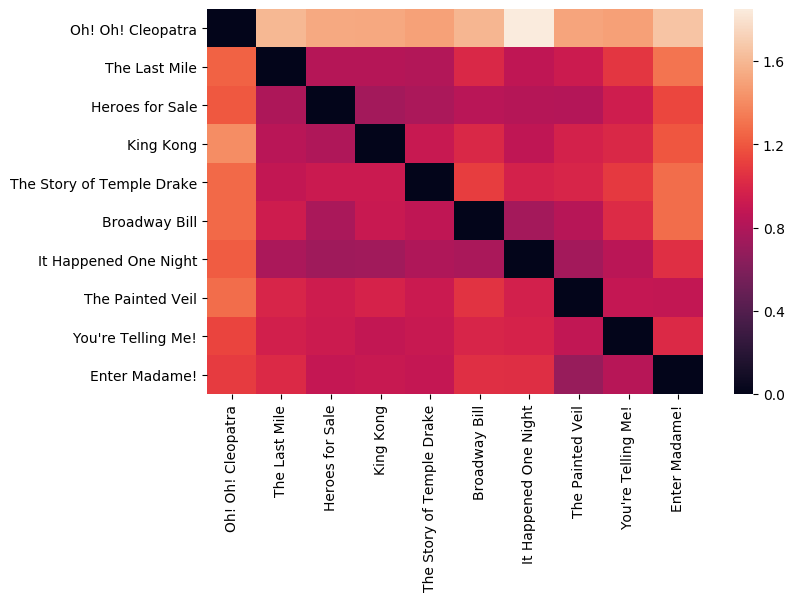

In [73]:
measure = 'KL'
fileids_sp = list(df['Movie Name'])
corpora_sp = list(df['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

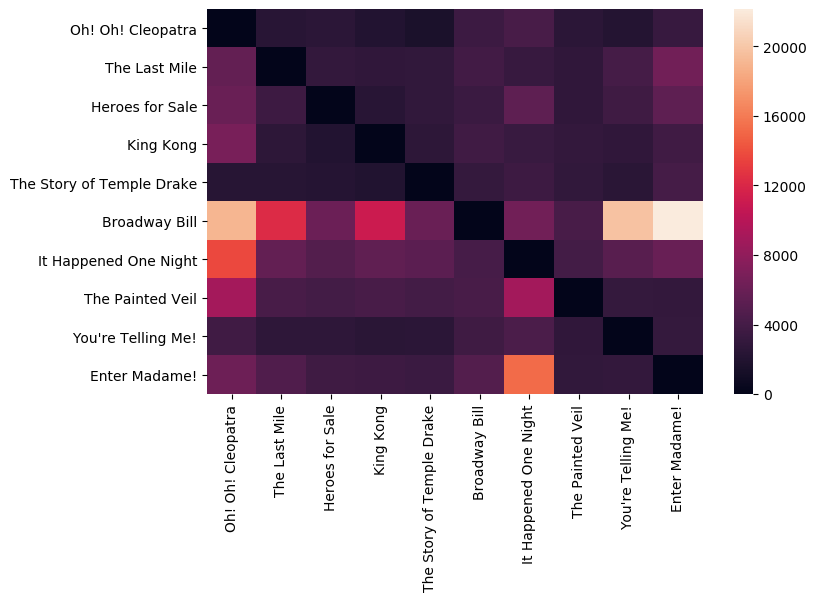

In [74]:
measure = 'Chi2'
fileids_sp = list(df['Movie Name'])
corpora_sp = list(df['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

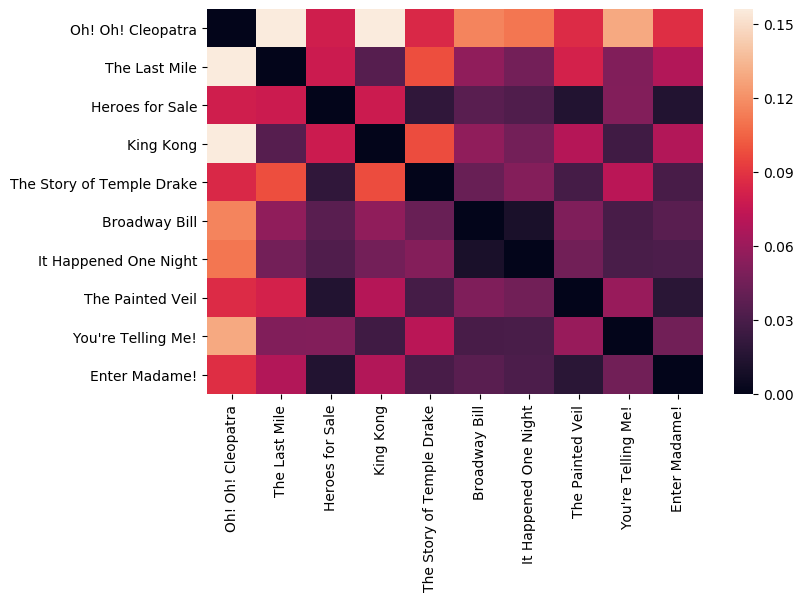

In [75]:
measure = 'KS'
fileids_sp = list(df['Movie Name'])
corpora_sp = list(df['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

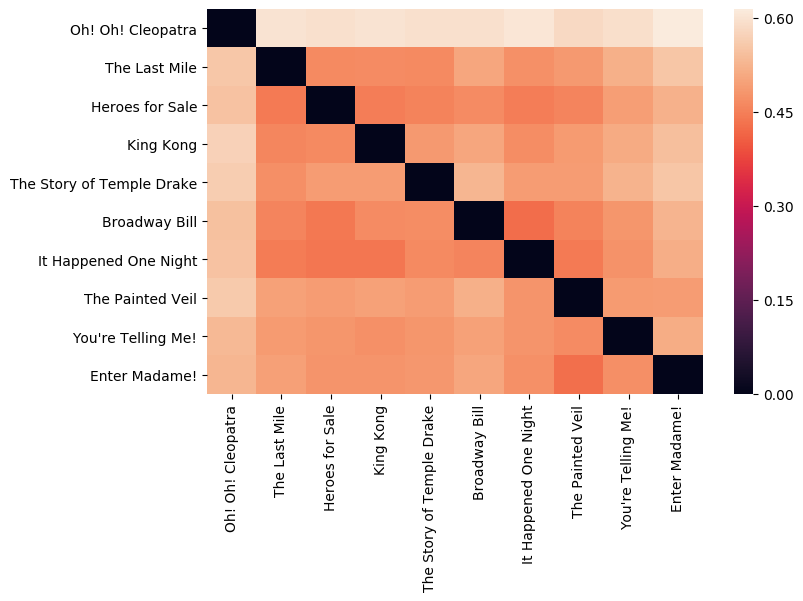

In [76]:
measure = 'JS'
fileids_sp = list(df['Movie Name'])
corpora_sp = list(df['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

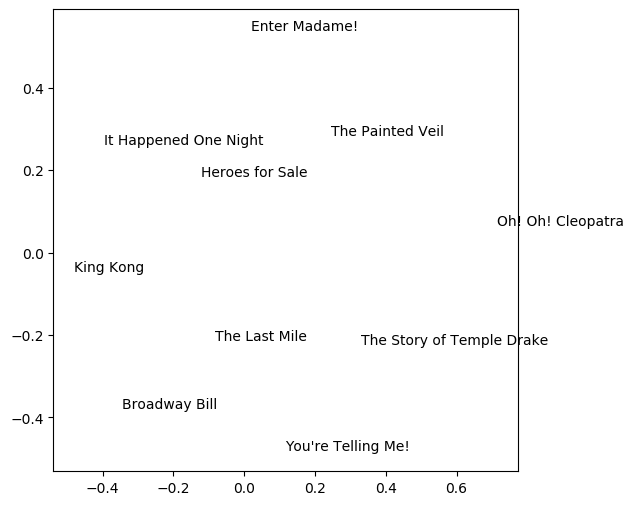

In [77]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(list(df['Movie Name'])):
    ax.annotate(txt, (x[i],y[i]))